# Bangladesh Temperature and Rain Analysis and Forecast

Data Source: https://www.kaggle.com/yakinrubaiat/bangladesh-weather-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data/Temp_and_rain.csv')
df.head()

tem  Month  Year      rain
0  16.9760      1  1901   18.5356
1  19.9026      2  1901   16.2548
2  24.3158      3  1901   70.7981
3  28.1834      4  1901   66.1616
4  27.8892      5  1901  267.2150

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1380 non-null   float64
 1   Month   1380 non-null   int64  
 2   Year    1380 non-null   int64  
 3   rain    1380 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 43.2 KB


In [4]:
df['ds'] = df.Year.astype('str') + '-' + df.Month.astype('str')
df['ds'] = pd.to_datetime(df['ds'])
df

tem  Month  Year       rain         ds
0     16.9760      1  1901   18.53560 1901-01-01
1     19.9026      2  1901   16.25480 1901-02-01
2     24.3158      3  1901   70.79810 1901-03-01
3     28.1834      4  1901   66.16160 1901-04-01
4     27.8892      5  1901  267.21500 1901-05-01
...       ...    ...   ...        ...        ...
1375  28.0642      8  2015  512.12700 2015-08-01
1376  28.1230      9  2015  353.86900 2015-09-01
1377  26.8624     10  2015   81.59940 2015-10-01
1378  23.1842     11  2015    4.60815 2015-11-01
1379  18.7124     12  2015    5.97798 2015-12-01

[1380 rows x 5 columns]

In [5]:
df.index = df.ds

### Pairplot

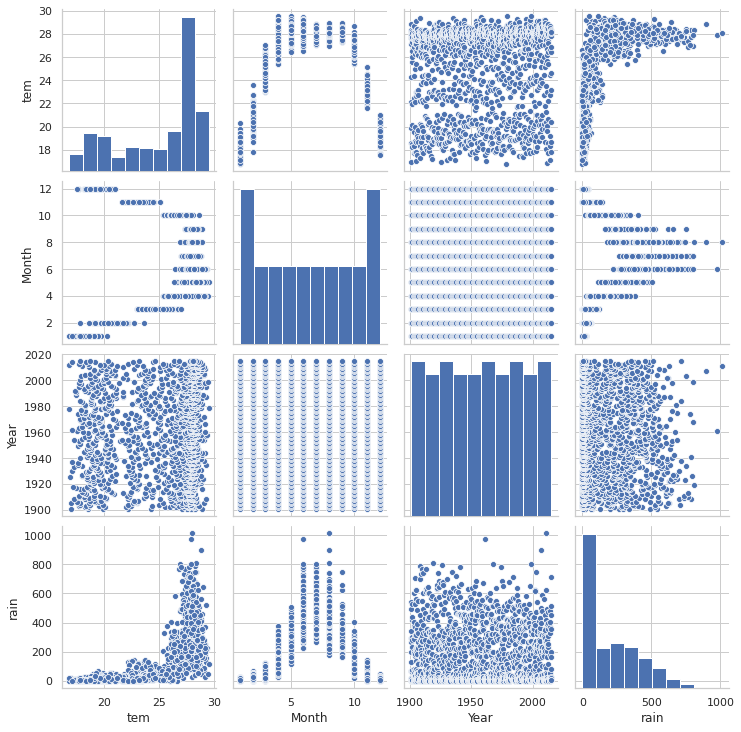

In [6]:
sns.set(style="whitegrid")

sns.pairplot(df)
plt.show()

### Temperature and Rain - Yearly Aggregated

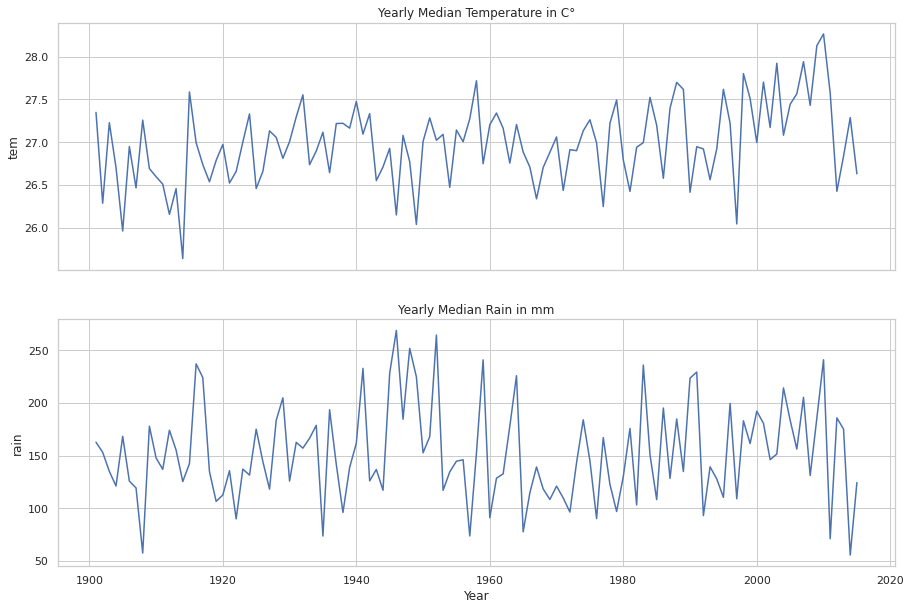

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)

sns.lineplot(
    x='Year',
    y='tem', 
    data=df.resample('Y').median(), 
    alpha=1,
    ax=ax1)

ax1.set_title('Yearly Median Temperature in C°')


sns.lineplot(
    x='Year',
    y='rain', 
    data=df.resample('Y').median(), 
    alpha=1,
    ax=ax2)

ax2.set_title('Yearly Median Rain in mm')

plt.show()

### Connection between temperature and rain

In [8]:
correlation_temp_rain_monthly = np.round(np.corrcoef(df.tem, df.rain)[0][1], 4)
correlation_temp_rain_yearly = np.round(np.corrcoef(df.resample('A').median()['tem'], df.resample('A').median()['rain'])[0][1], 4)

print('Correlation between monthly temperature and rain:', correlation_temp_rain_monthly)
print('Correlation between yearly temperature and rain:', correlation_temp_rain_yearly)

Correlation between monthly temperature and rain: 0.6998
Correlation between yearly temperature and rain: -0.0418


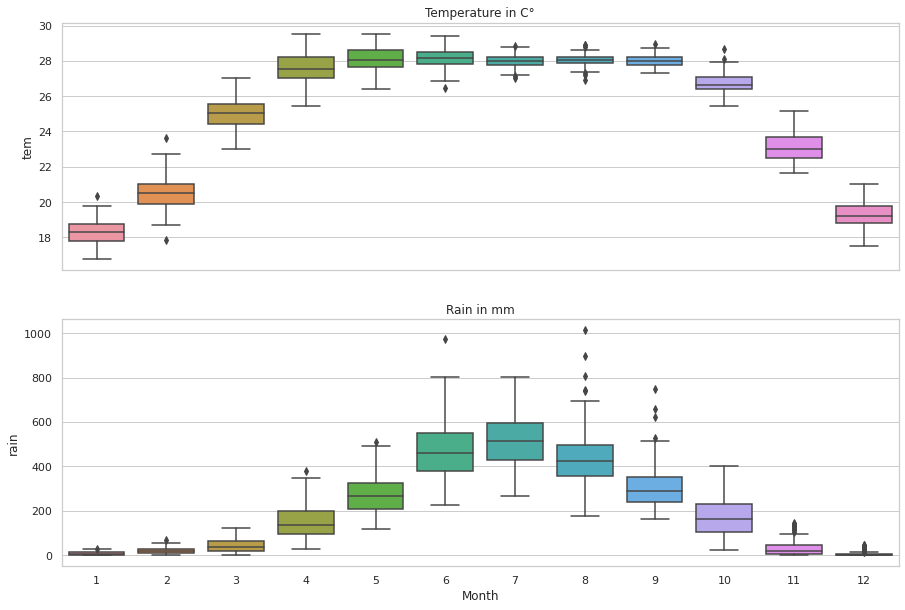

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)

sns.boxplot('Month', 'tem', data=df, ax=ax1)
ax1.set_title('Temperature in C°')
ax1.set(xlabel='')

sns.boxplot('Month', 'rain', data=df, ax=ax2)
ax2.set_title('Rain in mm')

plt.show()

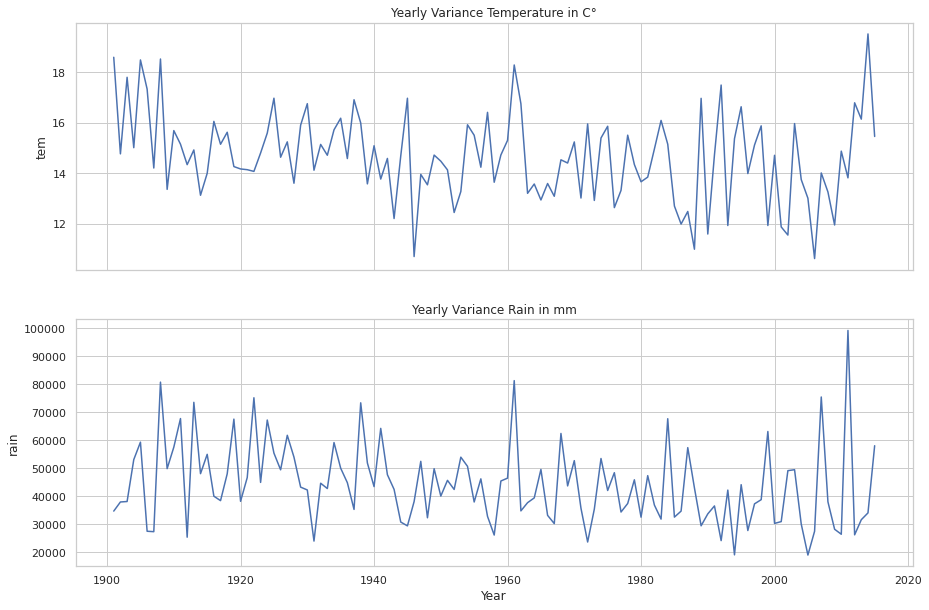

In [10]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)

sns.lineplot(
    x=df.resample('Y').median()['Year'],
    y=df.resample('Y').var()['tem'], 
    ax=ax1)

ax1.set_title('Yearly Variance Temperature in C°')

sns.lineplot(
    x=df.resample('Y').median()['Year'],
    y=df.resample('Y').var()['rain'], 
    ax=ax2)

ax2.set_title('Yearly Variance Rain in mm')

plt.show()

### Linear Relationship between Time and Temperature/Rain

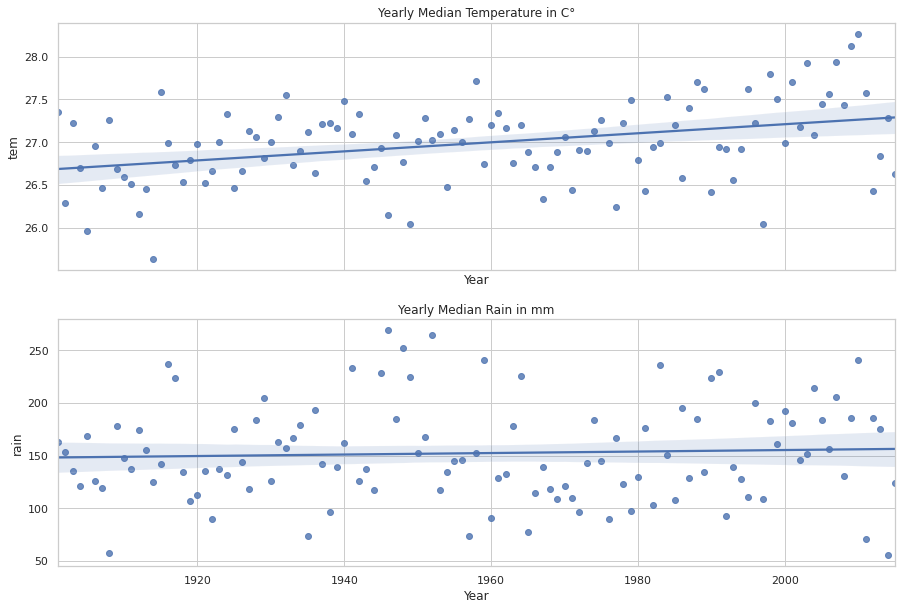

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)

sns.regplot(
    x=df.resample('Y').median()['Year'],
    y=df.resample('Y').median()['tem'],
    ax=ax1)

ax1.set_title('Yearly Median Temperature in C°')

sns.regplot(
    x=df.resample('Y').median()['Year'],
    y=df.resample('Y').median()['rain'],
    ax=ax2)

ax2.set_title('Yearly Median Rain in mm')

plt.show()

## Forecast

### Temperature

In [12]:
df_temp = pd.DataFrame(columns=['ds', 'y'])
df_temp['ds'] = df['ds']
df_temp['y'] = df['tem']
df_temp.reset_index(drop=True, inplace=True)
df_temp

ds        y
0    1901-01-01  16.9760
1    1901-02-01  19.9026
2    1901-03-01  24.3158
3    1901-04-01  28.1834
4    1901-05-01  27.8892
...         ...      ...
1375 2015-08-01  28.0642
1376 2015-09-01  28.1230
1377 2015-10-01  26.8624
1378 2015-11-01  23.1842
1379 2015-12-01  18.7124

[1380 rows x 2 columns]

In [13]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=100)
m.fit(df_temp)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=240, freq='M')
future.tail()

ds
1615 2035-07-31
1616 2035-08-31
1617 2035-09-30
1618 2035-10-31
1619 2035-11-30

In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
1615 2035-07-31  28.562790   27.356886   29.624489
1616 2035-08-31  28.492543   27.477151   29.574918
1617 2035-09-30  27.650461   26.614143   28.665805
1618 2035-10-31  23.813670   22.773724   24.819076
1619 2035-11-30  19.787801   18.881998   20.697036

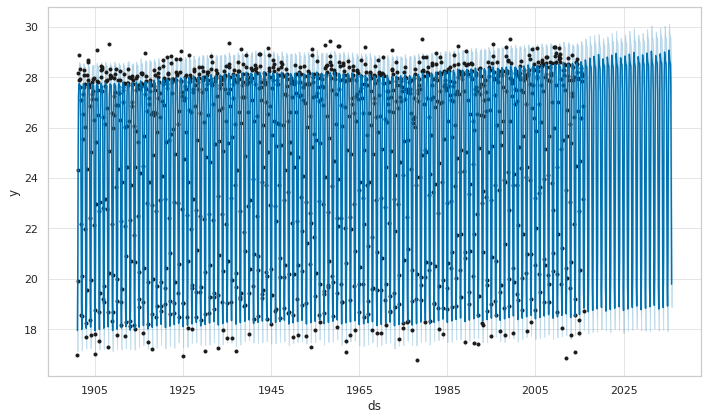

In [16]:
fig1 = m.plot(forecast)

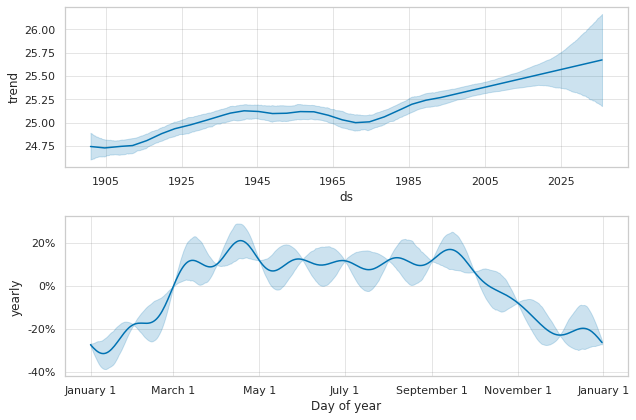

In [17]:
fig2 = m.plot_components(forecast)

In [18]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)
py.iplot(fig)

### Rain

In [19]:
df_rain = pd.DataFrame(columns=['ds', 'y'])
df_rain['ds'] = df['ds']
df_rain['y'] = df['rain']
df_rain.reset_index(drop=True, inplace=True)
df_rain

ds          y
0    1901-01-01   18.53560
1    1901-02-01   16.25480
2    1901-03-01   70.79810
3    1901-04-01   66.16160
4    1901-05-01  267.21500
...         ...        ...
1375 2015-08-01  512.12700
1376 2015-09-01  353.86900
1377 2015-10-01   81.59940
1378 2015-11-01    4.60815
1379 2015-12-01    5.97798

[1380 rows x 2 columns]

In [20]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=100)
m.fit(df_rain)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = m.make_future_dataframe(periods=240, freq='M')
future.tail()

ds
1615 2035-07-31
1616 2035-08-31
1617 2035-09-30
1618 2035-10-31
1619 2035-11-30

In [22]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1615 2035-07-31  493.326915  364.297974  621.292107
1616 2035-08-31  336.143783  218.965240  455.869274
1617 2035-09-30   88.345339  -23.641881  198.034840
1618 2035-10-31   -0.869505 -110.335226  112.944655
1619 2035-11-30   -2.574756 -119.187432  111.494965

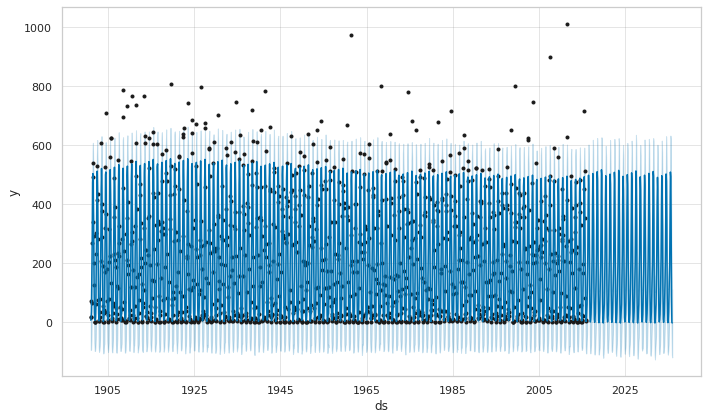

In [23]:
fig1 = m.plot(forecast)

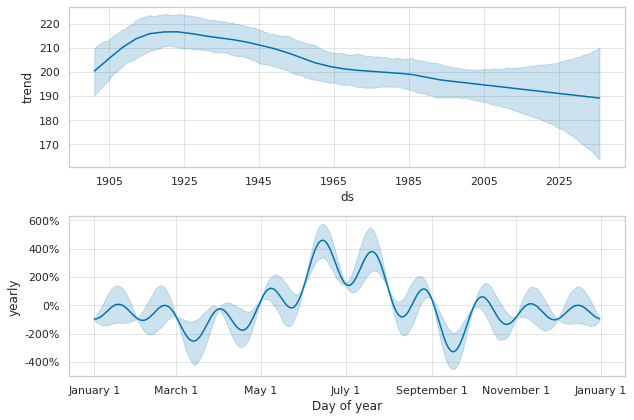

In [24]:
fig2 = m.plot_components(forecast)

In [25]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)
py.iplot(fig)